In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Loading Data

In [240]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

df = pd.read_csv(url, header=0)

df.head(3)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.6,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946


## Basic Information

In [241]:
# Column data types
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [242]:
df.info

<bound method DataFrame.info of      Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            35.560     

In [243]:
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


#### Round off Screen_Size_cm to 2 decimal places

In [244]:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'], 2)

df['Screen_Size_cm'].head()

0    35.56
1    39.62
2    39.62
3    33.78
4    39.62
Name: Screen_Size_cm, dtype: float64

# Evaluate the dataset for missing data

In [245]:
# replace "?" with np.NAN
df.replace(["?", "", np.nan], np.NaN, inplace=True)

### Function to return Missing and Available data from Data Frame

In [246]:
def table_summary(data_frame: pd.DataFrame, only_missing_data = True):

  data_types = []
  for col in data_frame.columns:
    data_types.append(data_frame[col].dtypes)
    
    
  data_frame = data_frame.isnull()

  table = pd.DataFrame(columns=['Columns','Data_type', "Missing_data", "Available_data", "Total"])
  table = table.loc[:0]
  
  record = []
  missing_value = 0
  available = 0
  
  for i, column in enumerate(data_frame.columns.values.tolist()):
    type = data_types[i]
    for row in data_frame[column]:
      if row == True:
        missing_value += 1
      else:
        available +=1
    
    record.append(column)
    record.append(type)
    record.append(missing_value)
    record.append(available)
    record.append(missing_value + available)

    table.loc[len(table)] = record
    
    # reset
    missing_value = 0
    available = 0
    record = []
    type = ""
  
  if only_missing_data:
    return table[table['Missing_data'] > 0]
  else:
    return table
  

#### View Missing Data

In [247]:
# View Missing Data

missing_data = table_summary(data_frame=df, only_missing_data=True)

missing_data

,Columns,Data_type,Missing_data,Available_data,Total
7,Screen_Size_cm,float64,4,234,238
11,Weight_kg,float64,5,233,238


### Replacing Missing data with mean

In [248]:
# average weight_kg
avg_weight_kg = df['Weight_kg'].mean()
print(avg_weight_kg)

#replace
df['Weight_kg'] = df['Weight_kg'].replace(np.nan, avg_weight_kg)

1.8622317596566522


### Replacing Missing data with most frequent value

In [249]:
# get the most frequent
max_value = df['Screen_Size_cm'].value_counts().idxmax()

#replace
df['Screen_Size_cm'].replace(np.nan, max_value, inplace=True)

In [250]:
df[['Weight_kg', 'Screen_Size_cm']].dtypes

Weight_kg         float64
Screen_Size_cm    float64
dtype: object

## Data Standardization
- 1 inch = 2.54 cm
- 1 kg   = 2.205 pounds

In [251]:
# Converting Screen size in cm to inches
df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54

# converting Weight to pounds
df['Weight_kg'] = df['Weight_kg'] * 2.205

#rename
df.rename(columns={'Screen_Size_cm': 'Screen_Size_inch', 
           'Weight_kg': 'Weight_pounds'}, inplace=True)


In [252]:
table_summary(df, False)

,Columns,Data_type,Missing_data,Available_data,Total
0,Unnamed: 0,int64,0,238,238
1,Manufacturer,object,0,238,238
2,Category,int64,0,238,238
3,Screen,object,0,238,238
4,GPU,int64,0,238,238
5,OS,int64,0,238,238
6,CPU_core,int64,0,238,238
7,Screen_Size_inch,float64,0,238,238
8,CPU_frequency,float64,0,238,238
9,RAM_GB,int64,0,238,238


In [253]:
df['CPU_frequency']

0      1.6
1      2.0
2      2.7
3      1.6
4      1.8
      ... 
233    2.6
234    2.4
235    2.6
236    2.5
237    2.3
Name: CPU_frequency, Length: 238, dtype: float64

### Data Normalization
<p> Normalize 'CPU_frequency' using 'Simple Feature Scaling'

In [254]:
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

## Binning - 'Price'
Create 3 bins (Low, Medium, High) for 'Price' 

In [255]:
num_bin = 4
bin_names = ["Low", "Medium", "High"]

#create bins
bins = np.linspace(df['Price'].min(), df['Price'].max(), num_bin)

df['Price_binned'] = pd.cut(df['Price'], bins, labels=bin_names, include_lowest=True)


#### Plot chart base on bins

Text(0.5, 1.0, 'Price Bins')

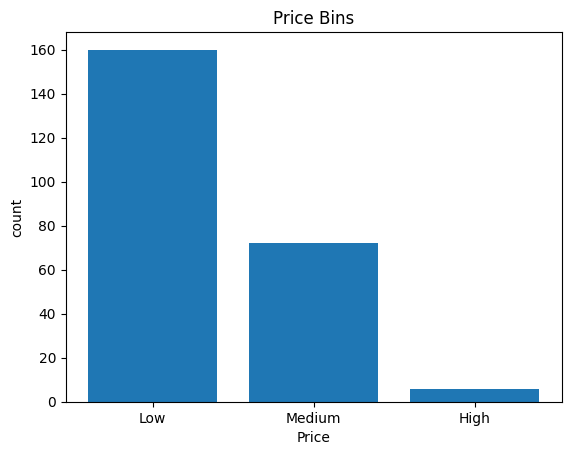

In [256]:
plt.bar(bin_names, df['Price_binned'].value_counts())

# set x/y labels and titles
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price Bins")


## Indicator Variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [257]:
# get dummy variables
dummy_variable = pd.get_dummies(df['Screen'], prefix='Screen').astype(int)

# Merge dummy variables and df
df = pd.concat([df, dummy_variable], axis=1)

# drop old column - Screen
df.drop('Screen', axis=1, inplace=True)

table_summary(df, False)

,Columns,Data_type,Missing_data,Available_data,Total
0,Unnamed: 0,int64,0,238,238
1,Manufacturer,object,0,238,238
2,Category,int64,0,238,238
3,GPU,int64,0,238,238
4,OS,int64,0,238,238
5,CPU_core,int64,0,238,238
6,Screen_Size_inch,float64,0,238,238
7,CPU_frequency,float64,0,238,238
8,RAM_GB,int64,0,238,238
9,Storage_GB_SSD,int64,0,238,238


# Save File

In [258]:
df.to_csv('clean_laptop_pricing.csv')